# Constants

In [1]:
ID = "ID"
GENDER = "Gender"
AGE = "Age"
HYPERTENSION = "Hypertension"
HEART_DISEASE = "Heart Disease"
EVER_MARRIED = "Ever Married"
WORK_TYPE = "Work Type"
RESIDENCE_TYPE = "Residence Type"
AVG_GLUCOSE_LEVEL = "Average Glucose Level"
BMI = "BMI"
SMOKING_STATUS = "Smoking Status"
STROKE = "Stroke"

# Import

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt

# Loading Dataset

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Cleaning

In [4]:
df.fillna(0, inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
if "id" in df.columns: df = df.drop(["id"], axis=1)
if "work_type" in df.columns: df = df.drop(["work_type"], axis=1)
print(df.columns)
df.columns = [GENDER, AGE, HYPERTENSION, HEART_DISEASE, EVER_MARRIED, RESIDENCE_TYPE, AVG_GLUCOSE_LEVEL, BMI, SMOKING_STATUS, STROKE]
df.head()

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke'],
      dtype='object')


,Gender,Age,Hypertension,Heart Disease,Ever Married,Residence Type,Average Glucose Level,BMI,Smoking Status,Stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Rural,202.21,0.0,never smoked,1
2,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1


In [6]:
# gender: male = 0, female = 1, other = 2 ;
# ever married: yes = 1, no = 0 ;
# work type: children = 0, govt job = 1, never worked = 2, private = 3, self-employed = 4 ;
# residence type: rural = 0, urban = 1 ;
# smoking status: formerly smoked = 0, never smoked = 1, smokes = 2, unknown = 3

df[GENDER] = df[GENDER].replace({"Male": 0, "Female": 1, "Other": 2}).astype(int)
df[EVER_MARRIED] = df[EVER_MARRIED].replace({"Yes": 1, "No": 0}).astype(int)
df[RESIDENCE_TYPE] = df[RESIDENCE_TYPE].replace({"Rural": 0, "Urban": 1}).astype(int)
df[SMOKING_STATUS] = df[SMOKING_STATUS].replace({"formerly smoked": 0, "never smoked": 1, "smokes": 2, "Unknown": 3}).astype(int)
df.head()

C:\Users\sjshu\AppData\Local\Temp\ipykernel_33024\4277707953.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[GENDER] = df[GENDER].replace({"Male": 0, "Female": 1, "Other": 2}).astype(int)
C:\Users\sjshu\AppData\Local\Temp\ipykernel_33024\4277707953.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[EVER_MARRIED] = df[EVER_MARRIED].replace({"Yes": 1, "No": 0}).astype(int)
C:\Users\sjshu\AppData\Local\Temp\ipykernel_33024\4277707953.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed i

,Gender,Age,Hypertension,Heart Disease,Ever Married,Residence Type,Average Glucose Level,BMI,Smoking Status,Stroke
0,0,67.0,0,1,1,1,228.69,36.6,0,1
1,1,61.0,0,0,1,0,202.21,0.0,1,1
2,0,80.0,0,1,1,0,105.92,32.5,1,1
3,1,49.0,0,0,1,1,171.23,34.4,2,1
4,1,79.0,1,0,1,0,174.12,24.0,1,1


# Separating Data and Target

In [7]:
df_data = df.iloc[:, :-1]
df_target = df.iloc[:, -1]
df_data

,Gender,Age,Hypertension,Heart Disease,Ever Married,Residence Type,Average Glucose Level,BMI,Smoking Status
0,0,67.0,0,1,1,1,228.69,36.6,0
1,1,61.0,0,0,1,0,202.21,0.0,1
2,0,80.0,0,1,1,0,105.92,32.5,1
3,1,49.0,0,0,1,1,171.23,34.4,2
4,1,79.0,1,0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,1,83.75,0.0,1
5106,1,81.0,0,0,1,1,125.20,40.0,1
5107,1,35.0,0,0,1,0,82.99,30.6,1
5108,0,51.0,0,0,1,0,166.29,25.6,0


In [8]:
df_target

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: Stroke, Length: 5110, dtype: int64

# Splitting into Training and Testing Sets

In [9]:
data_train, data_test, target_train, target_test = train_test_split(df_data, df_target, test_size=0.2, shuffle=True, random_state=0)

# k-NN Classifier

In [10]:
K = 3
knn = KNeighborsClassifier(K)
knn.fit(data_train, target_train)
target_pred = knn.predict(data_test)
print(target_pred)

[0 0 0 ... 0 0 0]


# Evaluating the Model's Accuracy

In [11]:
accuracy_score(target_test, target_pred)

0.9403131115459883

# Parameter Experimentation

[(8, 0.9481409001956947), (9, 0.9481409001956947), (4, 0.9471624266144814)]
[(2, 0.9422700587084148), (3, 0.9403131115459883), (1, 0.9178082191780822)]


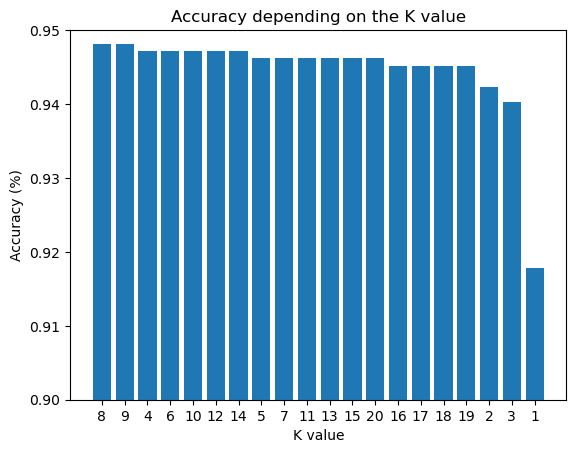

In [12]:
k_values = {}

for i in range(1, 21):
    knn = KNeighborsClassifier(i)
    knn.fit(data_train, target_train)
    target_pred = knn.predict(data_test)
    k_values[i] = accuracy_score(target_test, target_pred)

# Sort the accuracies from the best to the worst
sorted_outcome = sorted(k_values.items(), key=lambda x: x[1], reverse=True)
BEST_K_VALUE = sorted_outcome[0][0]

# Get 3 highest accuracies for different k_values
print(sorted_outcome[:3])

# Get 3 lowest accuracies for different k_values
print(sorted_outcome[-3:])

bins = list(map(lambda x: x / 100, range(90, 95)))

# accuracies = pd.Series(
# print(pd.crosstab(pd.cut(accuracies, bins=bins), "Count"))


plt.bar(list(map(lambda x: str(x[0]), sorted_outcome)), list(map(lambda x: x[1], sorted_outcome)), linewidth=3)
plt.ylim(bottom=0.9, top=0.95)
plt.title("Accuracy depending on the K value")
plt.xlabel("K value")
plt.ylabel("Accuracy (%)")
plt.show()

# Train-Test Split Analysis

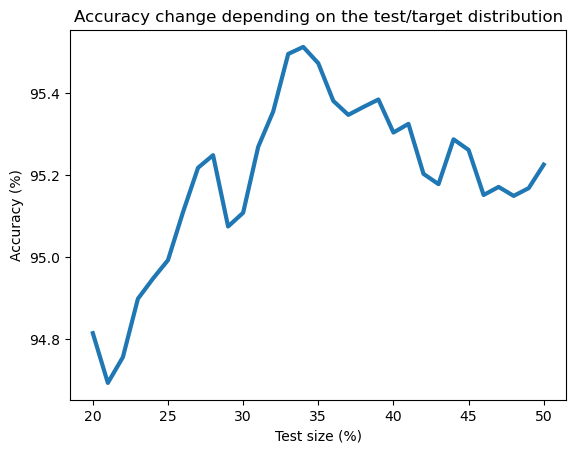

In [13]:
knn = KNeighborsClassifier(BEST_K_VALUE)
accuracies = []

for i in range(20, 51):
    data_train, data_test, target_train, target_test = train_test_split(df_data, df_target, test_size=i / 100, shuffle=True, random_state=0)
    knn.fit(data_train, target_train)
    target_pred = knn.predict(data_test)
    accuracies.append(accuracy_score(target_test, target_pred))    
    
plt.plot(range(20, 51), list(map(lambda x: x * 100, accuracies)), linewidth=3)
plt.title("Accuracy change depending on the test/target distribution")
plt.ylabel("Accuracy (%)")
plt.xlabel("Test size (%)")
plt.show()

# K-Fold Cross Validation

In [14]:
k = 5
kf = KFold(n_splits=k , shuffle=True, random_state=42)

# Train and Evaluate the Model with K-Fold Cross-Validation

In [15]:
k_neighbors = 3
accuracies = []

for train_index, test_index in kf.split(df_data):
    data_train, data_test = df_data.iloc[train_index], df_data.iloc[test_index]
    target_train, target_test = df_target.iloc[train_index], df_target.iloc[test_index]

    knn = KNeighborsClassifier(n_neighbors=k_neighbors)
    knn.fit(data_train, target_train)

    target_pred = knn.predict(data_test)

    accuracy = accuracy_score(target_test, target_pred)
    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print(average_accuracy)

0.9381604696673189


## Use Case Identification 

1. In terms of medical, KNN can be used to predict disease risk among patients regarding stroke by comparing past data with new patients features such as blood pressure, age, habits etc with similar past patients.

2. For businesses, by using KNN businesses like online markets or banks can understand their new customers income range, credit, loan risk, average expense etc by comparing with past customers profile.
